In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline


PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING

1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng
đầu tiên.


In [35]:
def load_data(filename):
    df = pd.read_csv(filename)
    return df

df = load_data('titanic_disaster.csv')
print("--- Top 10 rows ---")
display(df.head(10))

--- Top 10 rows ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat
map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


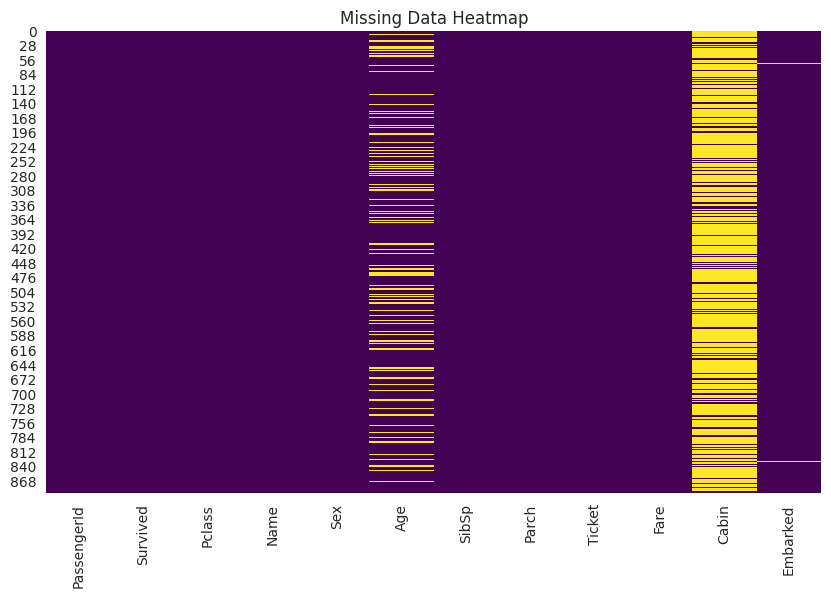

In [36]:

print(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi
tách cột xong thì xóa luôn cột Name

In [37]:
df[['firstName', 'secondName']] = df['Name'].str.split(',', expand=True)
df = df.drop('Name', axis=1)
display(df[['firstName', 'secondName']].head())

,firstName,secondName
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry


4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male → M và female → F

In [38]:

df['Sex'] = df['Sex'].map({'male': 'M', 'female': 'F'})
display(df['Sex'].head())

,Sex
0,M
1,F
2,F
3,F
4,M


5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa
ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng
vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau

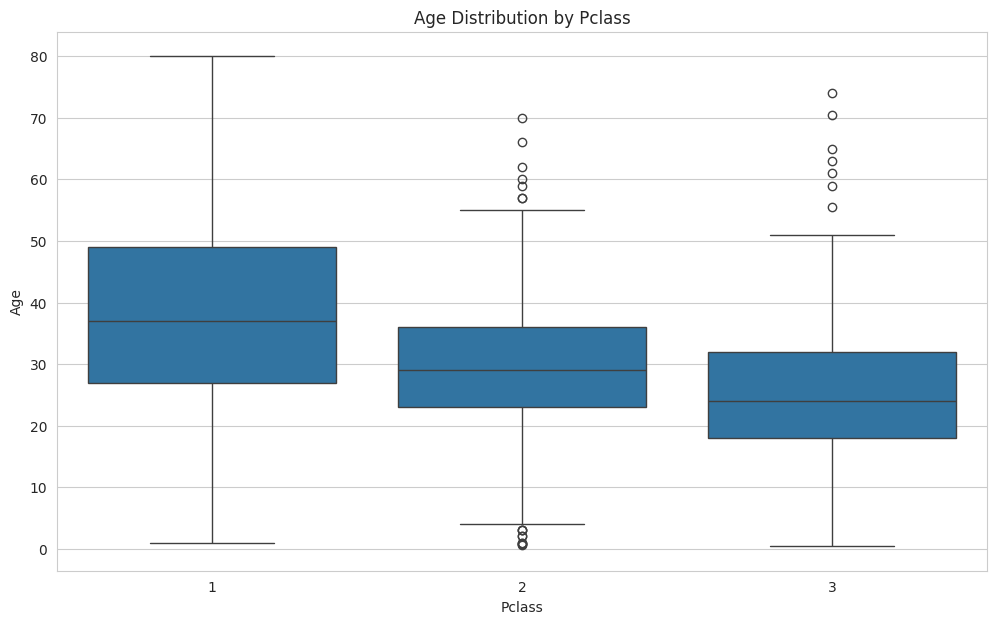

/tmp/ipython-input-3907232968.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipython-input-3907232968.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


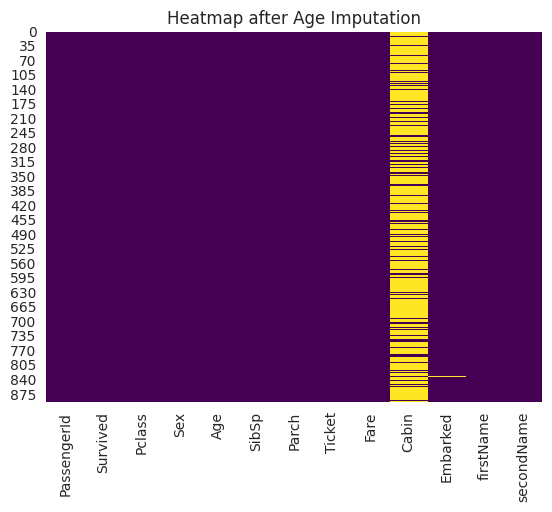

In [39]:
#a.
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Pclass')
plt.show()

#b.

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return df[df['Pclass'] == 1]['Age'].mean()
        elif Pclass == 2:
            return df[df['Pclass'] == 2]['Age'].mean()
        else:
            return df[df['Pclass'] == 3]['Age'].mean()
    else:
        return Age

df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap after Age Imputation')
plt.show()

6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa
trên độ tuổi của hành khách như sau: (age =< 12] → Kid; (12, 18]: Teen, (18, 60]: Adult
và ( age > 60): Older

In [40]:
bins = [0, 12, 18, 60, 200]
labels = ['Kid', 'Teen', 'Adult', 'Older']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

display(df[['Age', 'AgeGroup']].head())

,Age,AgeGroup
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult


7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr,
Mrs, Miss, Master ra khỏi “secondName”

In [41]:
df['namePrefix'] = df['secondName'].apply(lambda x: x.split('.')[0].strip())
display(df['namePrefix'].value_counts())

,count
namePrefix,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối
với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch


In [42]:
df['familySize'] = 1 + df['SibSp'] + df['Parch']
print(df[['SibSp', 'Parch', 'familySize']].head())

   SibSp  Parch  familySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


9. Tạo thêm đặc trưng ‘Alone’ để xác định hành khách đi theo nhóm hay cá nhân bằng cách
dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.

In [43]:

df['Alone'] = 0
df.loc[df['familySize'] == 1, 'Alone'] = 1

display(df[['familySize', 'Alone']].head())

,familySize,Alone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính
cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu
thì thay thế bằng “Unknown”

In [44]:
import pandas as pd

df['Cabin'] = df['Cabin'].fillna('Unknown')

df['typeCabin'] = df['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else 'Unknown')
print(df[['Cabin', 'typeCabin']])
print('---------')
print(df['typeCabin'].value_counts())

       Cabin typeCabin
0    Unknown   Unknown
1        C85         C
2    Unknown   Unknown
3       C123         C
4    Unknown   Unknown
..       ...       ...
886  Unknown   Unknown
887      B42         B
888  Unknown   Unknown
889     C148         C
890  Unknown   Unknown

[891 rows x 2 columns]
---------
typeCabin
Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: count, dtype: int64


PHẦN 2: KHAI THÁC THÔNG TIN HỮU ÍCH – EDA


12. Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng trên từng nhóm giới tính.


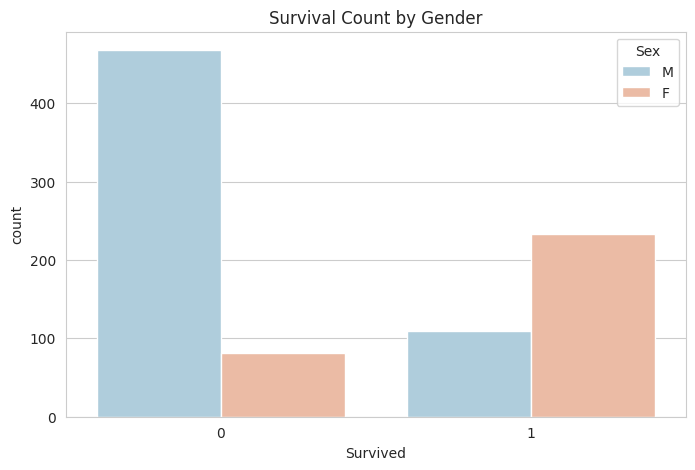

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=df, palette='RdBu_r')
plt.title('Survival Count by Gender')
plt.show()

Nhận xét:Phụ nữ (F) có tỷ lệ sống sót vượt trội: Số lượng phụ nữ sống sót (cột màu đỏ/cam bên phải) cao hơn rất nhiều so với nam giới.

Nam giới (M) thiệt mạng rất nhiều: Cột màu xanh bên trái cao vút, cho thấy phần lớn nam giới đã tử vong.

Kết luận: Giới tính là một đặc trưng cực kỳ quan trọng (feature importance cao). Chiến lược "Lady First" đã được thực hiện triệt để trong thảm họa này.

13. Trực quan thông tin hành khách sống sót trên từng nhóm phân loại hành khách (Pclass).

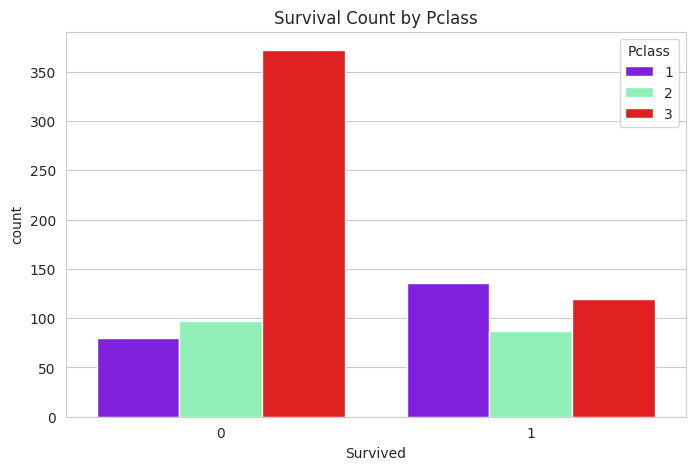

In [46]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Pclass', data=df, palette='rainbow')
plt.title('Survival Count by Pclass')
plt.show()

Nhận xét:
Phụ nữ (F) có tỷ lệ sống sót vượt trội: Số lượng phụ nữ sống sót (cột màu đỏ/cam bên phải) cao hơn rất nhiều so với nam giới.

Nam giới (M) thiệt mạng rất nhiều: Cột màu xanh bên trái cao vút, cho thấy phần lớn nam giới đã tử vong.

Kết luận: Giới tính là một đặc trưng cực kỳ quan trọng (feature importance cao). Chiến lược "Lady First" đã được thực hiện triệt để trong thảm họa này.

14. Trực quan thông tin hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác


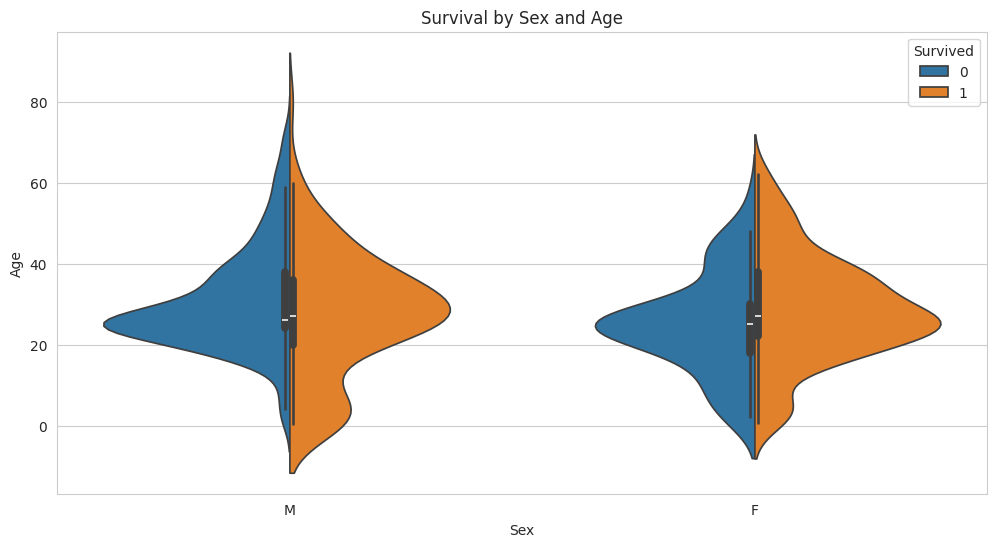

In [47]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True)
plt.title('Survival by Sex and Age')
plt.show()

Nhận xét:
Nam giới: Biểu đồ bên trái (M) cho thấy một "bụng" phình to ở độ tuổi nhỏ (dưới 15 tuổi) đối với phần màu cam (Survived). Điều này nghĩa là bé trai có cơ hội sống sót cao hơn hẳn đàn ông trưởng thành.

Nữ giới: Biểu đồ bên phải (F) có hình dạng khá cân đối, cho thấy phụ nữ ở mọi độ tuổi đều có cơ hội sống sót cao.

Kết luận: Quy tắc cứu hộ không chỉ là "Lady First" mà chính xác là "Women and Children First".

15. Trực quan xác suất hành khách sống sót dựa trên thông tin nhóm đi cùng

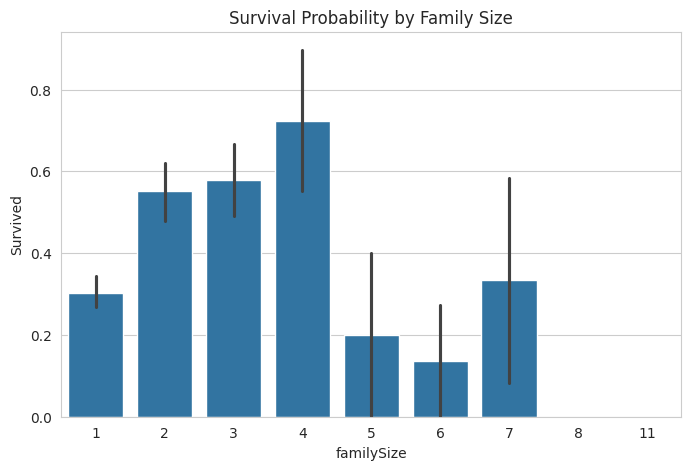

In [48]:
plt.figure(figsize=(8, 5))
sns.barplot(x='familySize', y='Survived', data=df)
plt.title('Survival Probability by Family Size')
plt.show()

Nhận xét :

Nhóm nhỏ (2-4 người): Có xác suất sống sót cao nhất (cột cao trên 0.5).

Đi một mình (FamilySize=1): Xác suất sống thấp (khoảng 0.3).

Gia đình quá đông (>4 người): Xác suất sống sót giảm mạnh, thậm chí về 0 với gia đình trên 8 người.

Kết luận: Đi theo nhóm nhỏ giúp hỗ trợ nhau tốt hơn, nhưng nhóm quá đông lại gây khó khăn trong việc di chuyển và tập hợp trong tình huống hỗn loạn.

16. Trực quan xác suất hành khách sống sót dựa trên thông tin giá vé


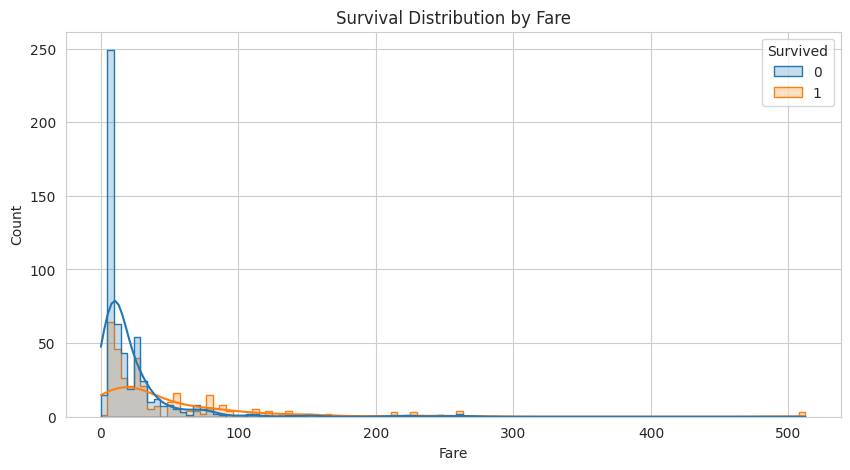

In [49]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Fare', hue='Survived', kde=True, element="step")
plt.title('Survival Distribution by Fare')
plt.show()

Nhận xét :

Giá vé thấp (< 20): Biểu đồ màu xanh (chết) cao vọt. Người nghèo/vé rẻ có tỷ lệ tử vong rất cao.

Giá vé cao: Biểu đồ màu cam (sống) bắt đầu lấn lướt khi giá vé tăng lên.

Kết luận: Có mối tương quan thuận (positive correlation) giữa giá vé và khả năng sống sót.

17. Trực quan số lượng người thiệt mạng và sống sót theo phân lớp (Pclass) hành khách và
cảng sẽ cập bến.

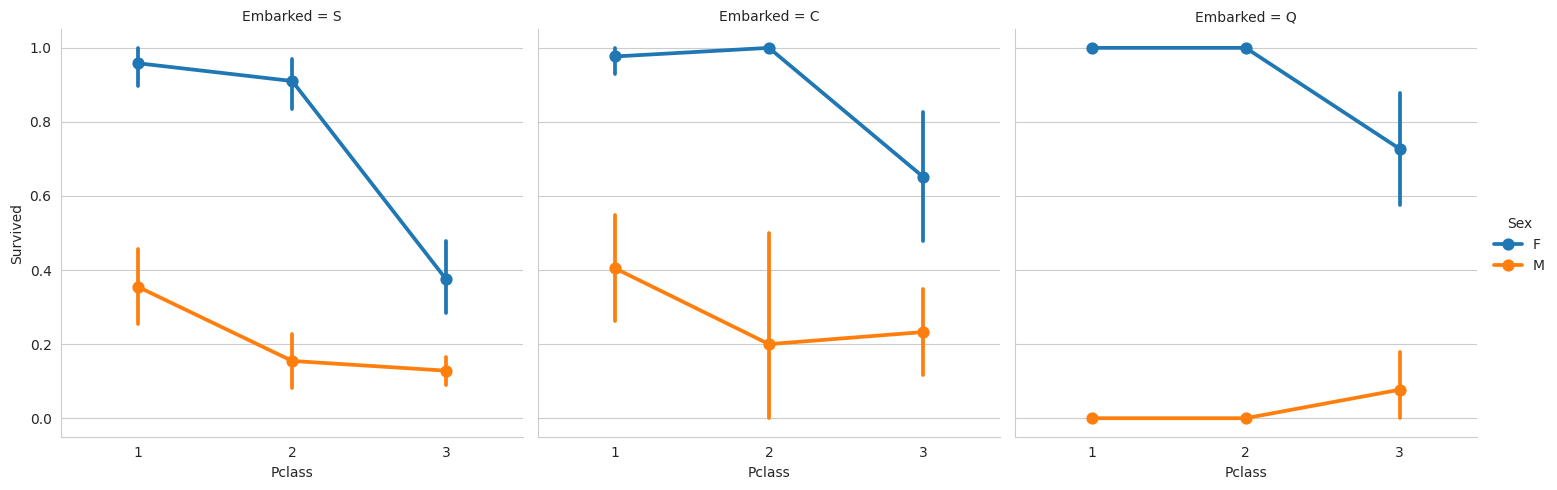

In [50]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', kind='point', data=df)
plt.show()

Nhận xét :
Cảng C (Cherbourg): Tỷ lệ sống sót của nam giới (đường màu xanh) ở Pclass 1 khá cao so với các cảng khác. Có thể do hành khách lên từ cảng này phần lớn là giới thượng lưu hoặc có vị trí cabin thuận lợi.
Cảng Q (Queenstown): Hầu hết là hành khách hạng 3 (Pclass 3), và tỷ lệ sống sót của nam giới ở đây cực thấp.
Cảng S (Southampton): Phụ nữ hạng 1 và 2 sống sót gần như tuyệt đối, nhưng nam giới hạng 2 và 3 lại thiệt mạng rất nhiều.